In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import matplotlib.colors as mcolors
import matplotlib.colors as mcolors
from scipy import stats
import itertools
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])

from sqlite3_database_plot import *

def parse_list(s):
    return list(map(int, s.strip('[]').split(', ')))


### Phase scan plot for a particular chip

In [2]:

def phase_scan_eRx(chip_number=101,out_dir="PLOTS",database='Econt_database',table='Econt_table'):
    data = get_data_point(from_column='chip_number', chip=chip_number, get_entry='phase_scan_eRx',database=database,table=table)
    prbs = np.array(json.loads(data[0][0]))
    x1 = np.array(prbs)
    
    a,b=np.meshgrid(np.arange(12),np.arange(15))
    norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 255, vcenter=.9)
    plt.figure(figsize=(15, 10))
    plt.hist2d(a.flatten(),b.flatten(),weights=x1.flatten(),bins=(np.arange(13)-0.5,np.arange(16)-0.5),cmap='bwr',norm = norm);
    plt.colorbar().set_label(label='Data transmission errors in PRBS')
    plt.yticks(np.arange(0,15,1))
    plt.xticks(np.arange(0,12,1))
    plt.grid(color='white', linestyle='--', linewidth=.5)
    suffix = "T"
    if table == "Econd_table":
        suffix="D"
    plt.title(f"ECON-{suffix} 1.28 GHz input phase chip {chip_number}")
    plt.ylabel('Phase Select Setting')
    plt.xlabel('Channel Number')
    odir= out_dir 
    if not os.path.isdir(odir):
        os.makedirs(odir)
    plt.savefig(f'{odir}/phase_scan_eRx_plot_chip_{chip_number}_Econ{suffix}.png',facecolor='w',dpi=300)
    # plt.close()
    plt.show()
    
def phase_scan_eTx(chip_number=101,out_dir='PLOTS',database='Econt_database',table='Econt_table'):
    data = get_data_point(from_column='chip_number', chip=chip_number, get_entry='phase_scan_eTx',database=database,table=table)
    io_scan = np.array(json.loads(data[0][0]))
    x2 = np.array(io_scan)
    x2 = np.minimum(x2, 255)
    norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 255, vcenter=0.1)
    plt.figure(figsize=(15, 10))
    suffix="T"
    if table=="Econt_table":
        a,b=np.meshgrid(np.arange(13),np.arange(63))
        plt.hist2d(a.flatten(),b.flatten(),weights=x2.flatten(),bins=(np.arange(14)-0.5,np.arange(64)-0.5),cmap='bwr',norm=norm);
        plt.xticks(np.arange(0,13,1))
    if table=="Econd_table":
        a,b=np.meshgrid(np.arange(6),np.arange(63))
        plt.hist2d(a.flatten(),b.flatten(),weights=x2.flatten(),bins=(np.arange(7)-0.5,np.arange(64)-0.5),cmap='bwr',norm=norm);
        plt.xticks(np.arange(0,6,1))
        suffix="D"
    plt.colorbar().set_label(label='Data transmission errors')
    plt.yticks(np.arange(0,64,4))    
    plt.grid(color='white', linestyle='--', linewidth=.5)
    plt.title(f"ECON-{suffix} 1.28 GHz output phase chip {chip_number}")
    plt.ylabel('Phase Select Setting')
    plt.xlabel('Channel Number')
    plt.ylabel('Phase Select Setting')
    plt.xlabel('Channel Number')
    odir= out_dir 
    if not os.path.isdir(odir):
        os.makedirs(odir)
    plt.savefig(f'{out_dir}/phase_scan_eTx_chip_{chip_number}_Econ{suffix}.png',dpi=300,facecolor='w')
#     plt.close()
    plt.show()

### Volin plot for good phase width of each elinks

In [3]:
def max_volin_plot_eRx(width="max_phase_width_eRx",label_="Max",out_dir='PLOTS',database='Econt_database.db',table='Econt_table'):
    width_ = get_column(column=width,database=database,table=table)
    data = np.array([parse_list(item[0]) for item in width_])
    plt.violinplot(data, showmeans=True, showextrema=True)
    plt.xticks(range(1,13), ['0','1', '2', '3' ,'4', '5', '6',
                                  '7', '8', '9', '10', '11'])
    suffix = "T"
    if table=="Econd_table":
        suffix="D"
    plt.title(f"ECON-{suffix} {label_} phase width of each eRx")
    plt.grid(color='r', linestyle='--', linewidth=.3)
    plt.ylabel(f'{label_} width')
    plt.xlabel('Channel')
    odir= out_dir 
    if not os.path.isdir(odir):
        os.makedirs(odir)
    plt.savefig(f'{out_dir}/{label_}_width_volin_of_all_eRx_Econ{suffix}.png', dpi=300, facecolor = "w")
    # plt.show()

def max_volin_plot_eTx(width="max_phase_width_eTx",label_="Max",out_dir='PLOTS',database='Econt_database.db',table='Econt_table'):
    width_ = get_column(column=width,database=database,table=table)
    data = np.array([parse_list(item[0]) for item in width_])
    plt.violinplot(data, showmeans=True, showextrema=True)
    suffix = "T"
    if table == "Econt_table":
        plt.xticks(range(1,14), ['0','1', '2', '3' ,'4', '5', '6',
                                      '7', '8', '9', '10', '11','12'])
    if table == "Econd_table":
        plt.xticks(range(1,7), ['0','1', '2', '3' ,'4', '5'])
        suffix = "D"
    plt.title(f"ECON-{suffix} {label_} phase width of each eTx")
    plt.grid(color='r', linestyle='--', linewidth=.3)
    plt.ylabel(f'{label_} width')
    plt.xlabel('Channel')
    odir= out_dir 
    if not os.path.isdir(odir):
        os.makedirs(odir)
    plt.savefig(f'{out_dir}/{label_}_width_volin_of_all_eTx_Econ{suffix}.png', dpi=300, facecolor = "w")
    # plt.show()



### plot of mean good phase width for each elinks

In [4]:
def mean_width_each_eRx(data="max_phase_width_eRx",label_="Max",out_dir="PLOTS",database="Econt_database",table="Econt_table"):
    data = get_column(column=data, database=database, table=table)
    parsed_data = [parse_list(item[0]) for item in data]
    ave = np.array(parsed_data).T
    means_max = [np.mean(sublist) for sublist in ave]
    errors_max = [stats.sem(sublist) for sublist in ave]
    plt.bar(range(len(means_max)), means_max, yerr=errors_max, align='center', alpha=0.9, ecolor='r', capsize=10)
    plt.xticks(range(len(means_max)), ['0', '1', '2', '3' ,'4', '5','6','7','8','9','10','11'])
    
    plt.grid(color='r', linestyle='--', linewidth=.3)
    plt.ylabel(f'Mean of {label_} width')
    plt.xlabel('Channel')
    odir= out_dir 
    suffix = "T"
    if not os.path.isdir(odir):
        os.makedirs(odir)
    if table=="Econt_dable":
        suffix = "D"
    plt.title(f"ECON-{suffix} {label_} phase width of each eRx")
    plt.savefig(f'{out_dir}/Average_{label_}_width_of_each_eRx_Econ{suffix}.png', dpi=300, facecolor = "w")
    # plt.show()
    
def mean_width_each_eTx(data="max_phase_width_eTx",label_="Max",out_dir="PLOTS",database="Econt_database",table="Econt_table"):
    data = get_column(column=data, database=database, table=table)
    parsed_data = [parse_list(item[0]) for item in data]
    ave = np.array(parsed_data).T
    means_max = [np.mean(sublist) for sublist in ave]
    errors_max = [stats.sem(sublist) for sublist in ave]
    plt.bar(range(len(means_max)), means_max, yerr=errors_max, align='center', alpha=0.9, ecolor='r', capsize=10)
    suffix="T"
    if table=="Econt_table":
        plt.xticks(range(len(means_max)), ['0', '1', '2', '3' ,'4', '5','6','7','8','9','10','11','12'])
        
    if table=="Econd_table":
        plt.xticks(range(len(means_max)), ['0', '1', '2', '3' ,'4', '5'])
        suffix="D"
    
    plt.title(f"ECON-{suffix} {label_} phase width of each eTx")
    plt.grid(color='r', linestyle='--', linewidth=.3)
    plt.ylabel(f'Mean of {label_} width')
    plt.xlabel('Channel')
    odir= out_dir 
    if not os.path.isdir(odir):
        os.makedirs(odir)
    plt.savefig(f'{out_dir}/Average_{label_}_width_of_each_eTx_Econ{suffix}.png', dpi=300, facecolor = "w")

### Phase width Histogram for all chips

In [5]:
def phase_width_hist_eRx(out_dir="PLOTS",database="Econt_database",table="Econt_table"):
    max_width = get_column("max_phase_width_eRx",database=database, table=table)
    max2_width = get_column("max2_phase_width_eRx",database=database, table=table)
    parsed_data = [parse_list(item[0]) for item in max_width]
    parsed_data2 = [parse_list(item[0]) for item in max2_width]
    flatten_array = np.array(parsed_data).flatten()
    flatten_array2 = np.array(parsed_data2).flatten()
    plt.hist(flatten_array, bins= np.arange(1,9,1)-0.5,color='r',alpha=0.5,label="Max eRx width")
    
    plt.hist(flatten_array2, histtype="step", bins= np.arange(1,9,1)-0.5,color='b',label="2Max eRx width")
    suffix ="T"
    if table=="Econd_table":
        suffix="D"
    plt.title(f"ECON-{suffix} eRx width")
    plt.grid(color='r', linestyle='--', linewidth=.3)
    plt.legend()
    plt.ylabel('Number of eRx')
    plt.xlabel('Phase width')
    odir= out_dir 
    if not os.path.isdir(odir):
        os.makedirs(odir)
    plt.savefig(f'{out_dir}/max_2max_width_of_all_eRx_Econ{suffix}.png', dpi=300, facecolor = "w")

    
def phase_width_hist_eTx(out_dir="PLOTS",database="Econt_database", table="Econt_table"):
    max_width = get_column("max_phase_width_eTx",database=database, table=table)
    max2_width = get_column("max2_phase_width_eTx",database=database, table=table)
    parsed_data = [parse_list(item[0]) for item in max_width]
    parsed_data2 = [parse_list(item[0]) for item in max2_width]
    flatten_array = np.array(parsed_data).flatten()
    flatten_array2 = np.array(parsed_data2).flatten()
    plt.hist(flatten_array, bins= np.arange(8,25,1)-0.5,color='r',alpha=0.5,label="Max eTx width")
    plt.hist(flatten_array2, histtype="step", bins= np.arange(8,25,1)-0.5,color='b',label="2Max eTx width")
    plt.xticks(np.arange(8,25,1))
    suffix ="T"
    if table=="Econd_table":
        suffix="D"
    plt.title(f"ECON-{suffix} eTx width")
    plt.grid(color='r', linestyle='--', linewidth=.3)
    plt.legend()
    plt.ylabel('Number of eTx')
    plt.xlabel('Phase width')
    odir= out_dir 
    if not os.path.isdir(odir):
        os.makedirs(odir)
    plt.savefig(f'{out_dir}/max_2max_width_of_all_eTx_Econ{suffix}.png', dpi=300, facecolor = "w")

In [6]:
##plot for each eTx 

In [7]:
def scan_eTx(chip_number=222,eTx=0, out_dir='PLOTS',database='Econt_database',table='Econt_table'):
    data = get_data_point(from_column='chip_number', chip=chip_number, get_entry='phase_scan_eTx',database='Econt_database',table='Econt_table')
    io_scan = np.array(json.loads(data[0][0]))
    x2 = np.array(io_scan)[:,eTx]
    x2 = np.minimum(x2, 5)
    n = np.arange(0,len(x2)).flatten()
    plt.plot(n,x2)
    suffix ="T"
    if table=="Econd_table":
        suffix="D"
    plt.title(f"ECON{suffix} Error counts for chip {chip_number} eTx {eTx}")
    plt.grid(color='r', linestyle='--', linewidth=.3)
    plt.xticks(np.arange(0,64,4))
    plt.ylabel('Error counts')
    plt.xlabel('Phase setting index')
    odir= out_dir 
    if not os.path.isdir(odir):
        os.makedirs(odir)
    plt.savefig(f'{out_dir}/ECON{suffix}_scan_eTx_chip_{chip_number}_eTx_{eTx}_Econt.png', dpi=300, facecolor = "w")


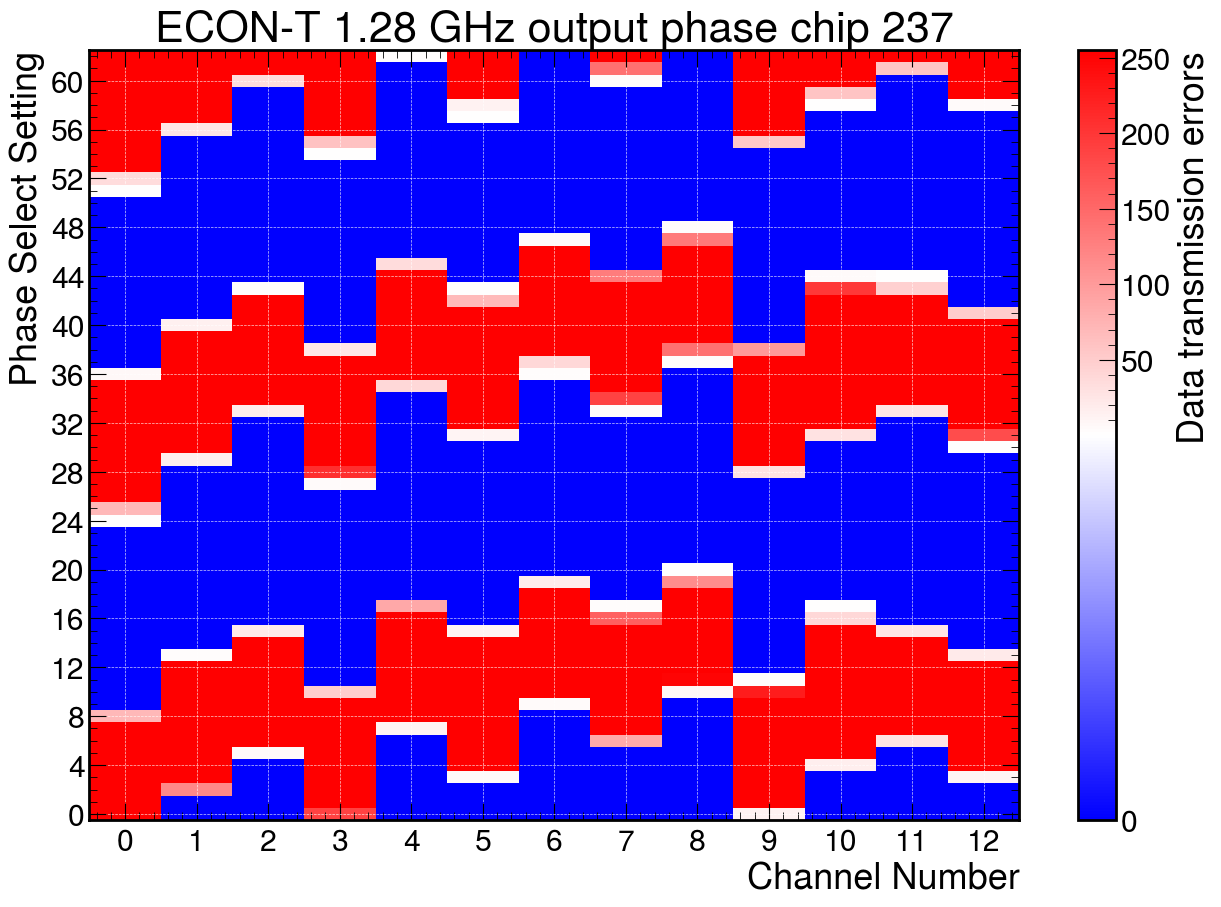

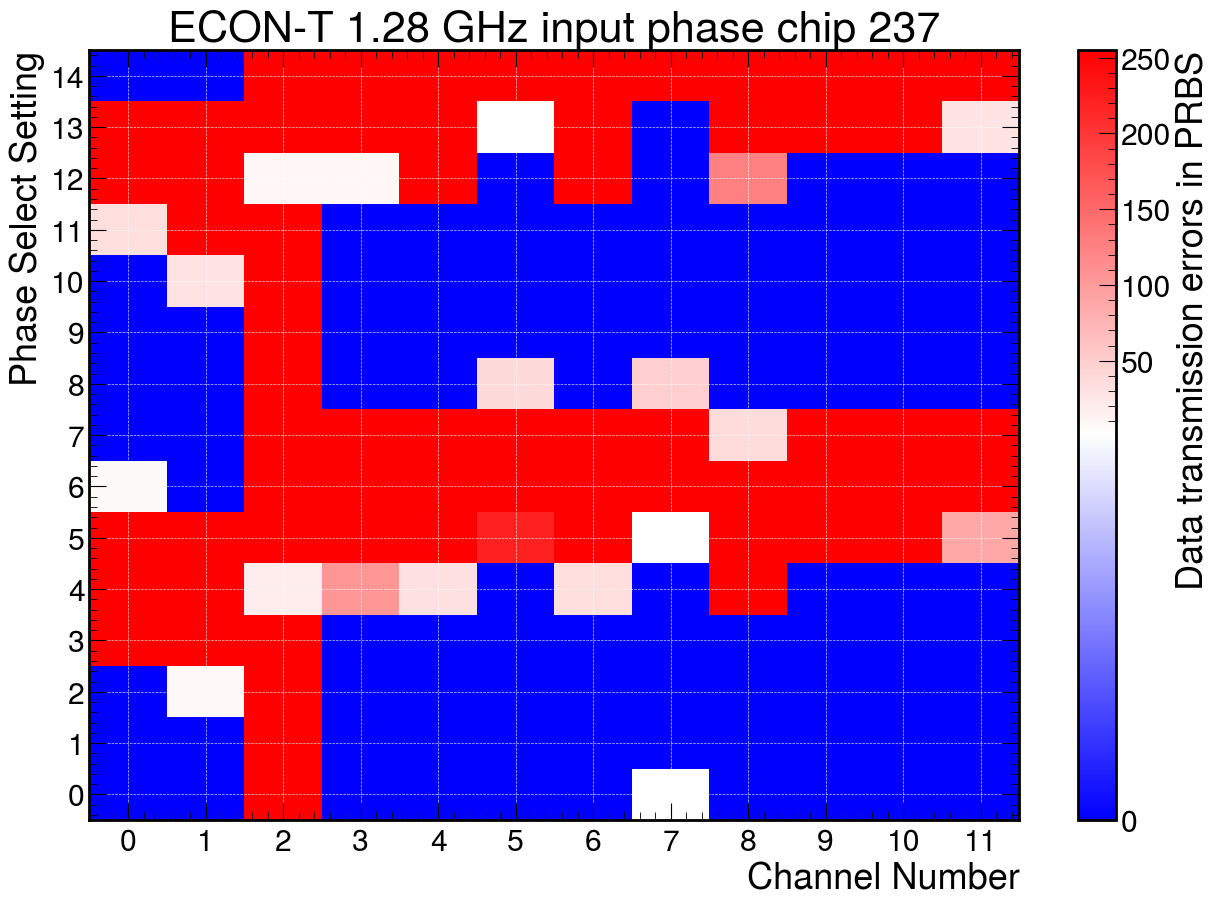

In [10]:
phase_scan_eTx(chip_number=237,out_dir='test_plots',database='Econt_database',table='Econt_table')
phase_scan_eRx(chip_number=237,out_dir='test_plots',database='Econt_database',table='Econt_table')

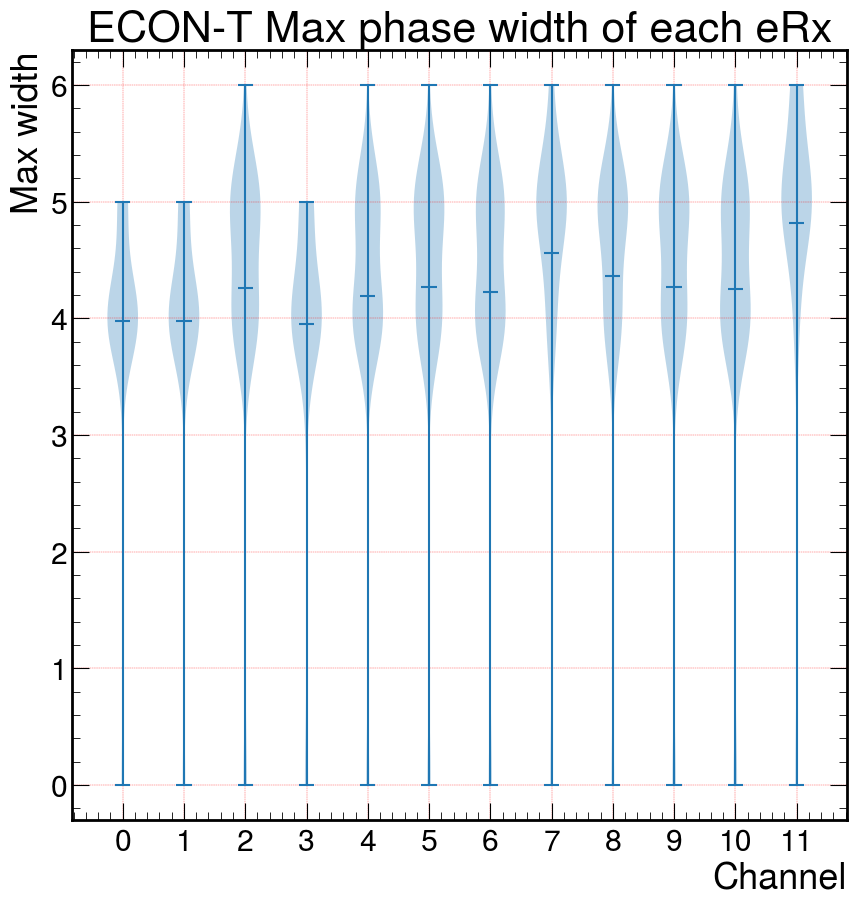

In [36]:
max_volin_plot_eRx("max_phase_width_eRx","Max","test_plots","Econt_database", "Econt_table");



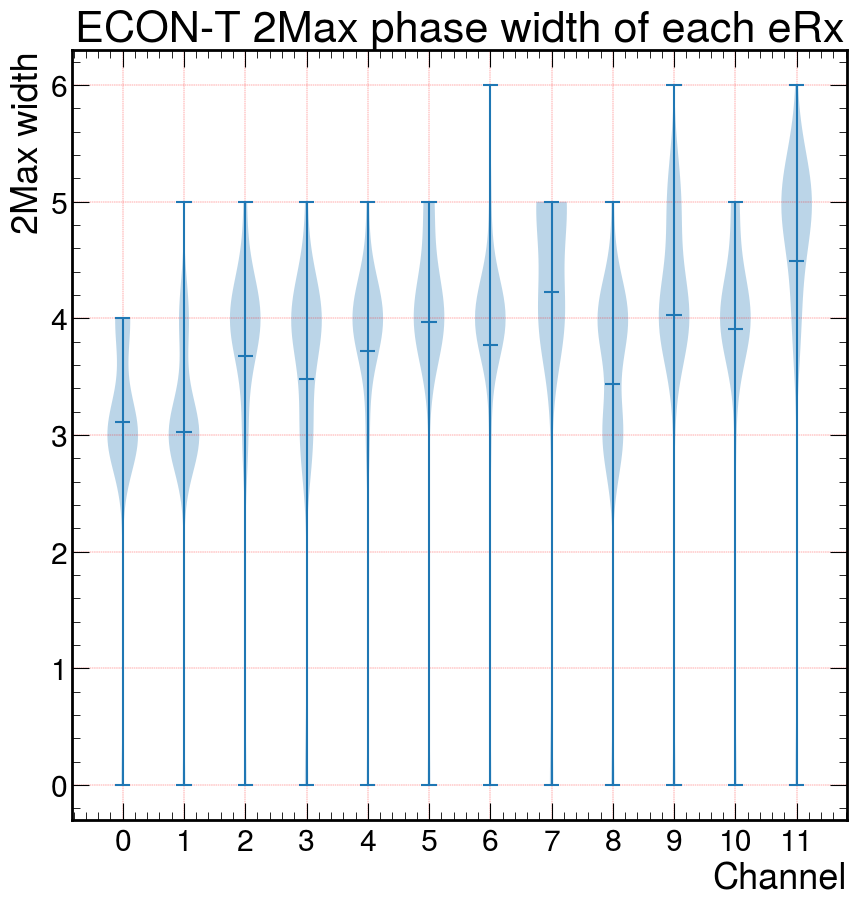

In [37]:
max_volin_plot_eRx("max2_phase_width_eRx","2Max","test_plots","Econt_database", "Econt_table")

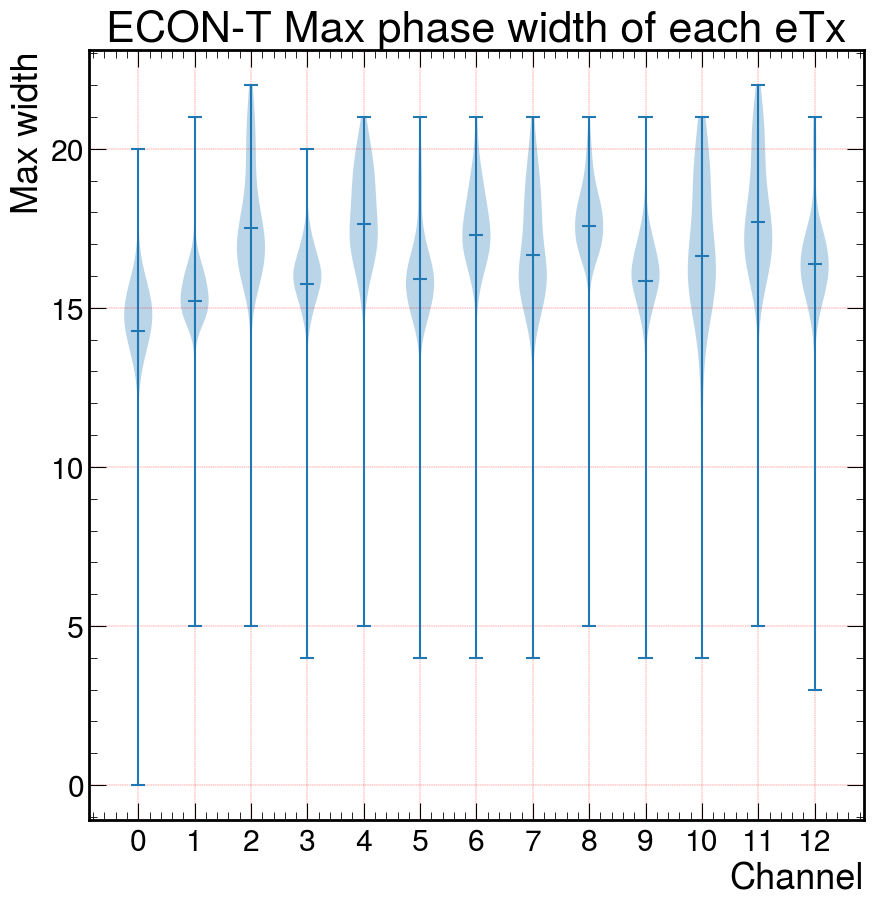

In [38]:
max_volin_plot_eTx("max_phase_width_eTx","Max","test_plots","Econt_database", "Econt_table")

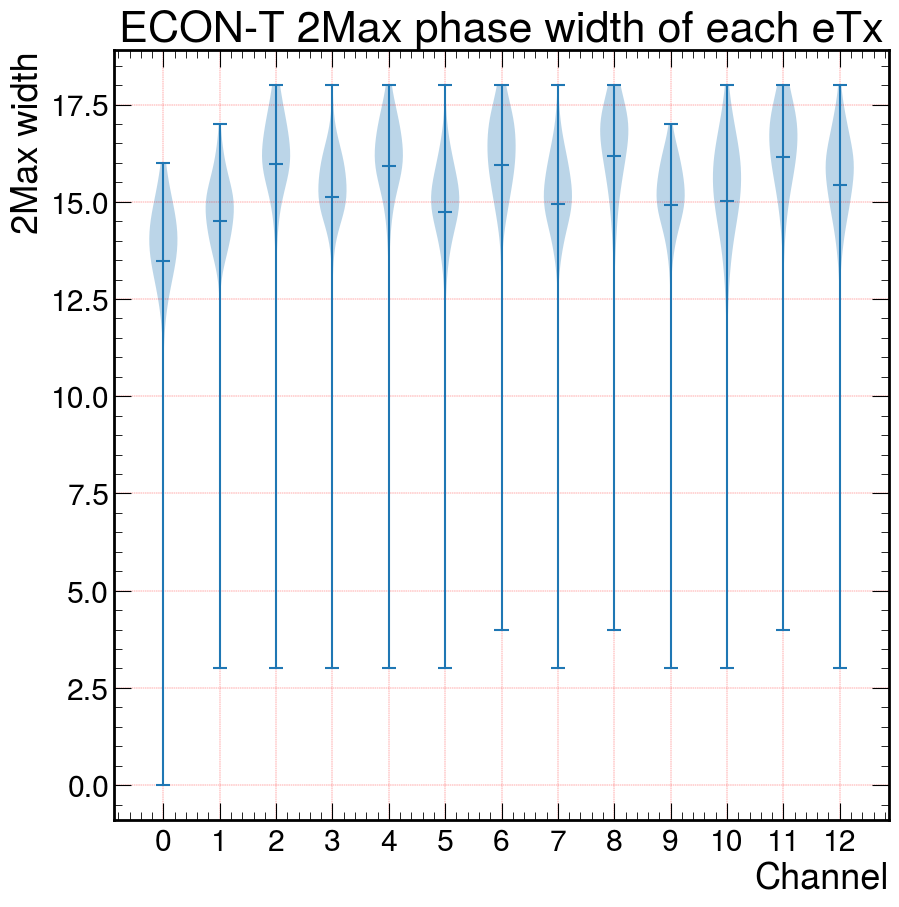

In [39]:
max_volin_plot_eTx("max2_phase_width_eTx","2Max","test_plots","Econt_database", "Econt_table")

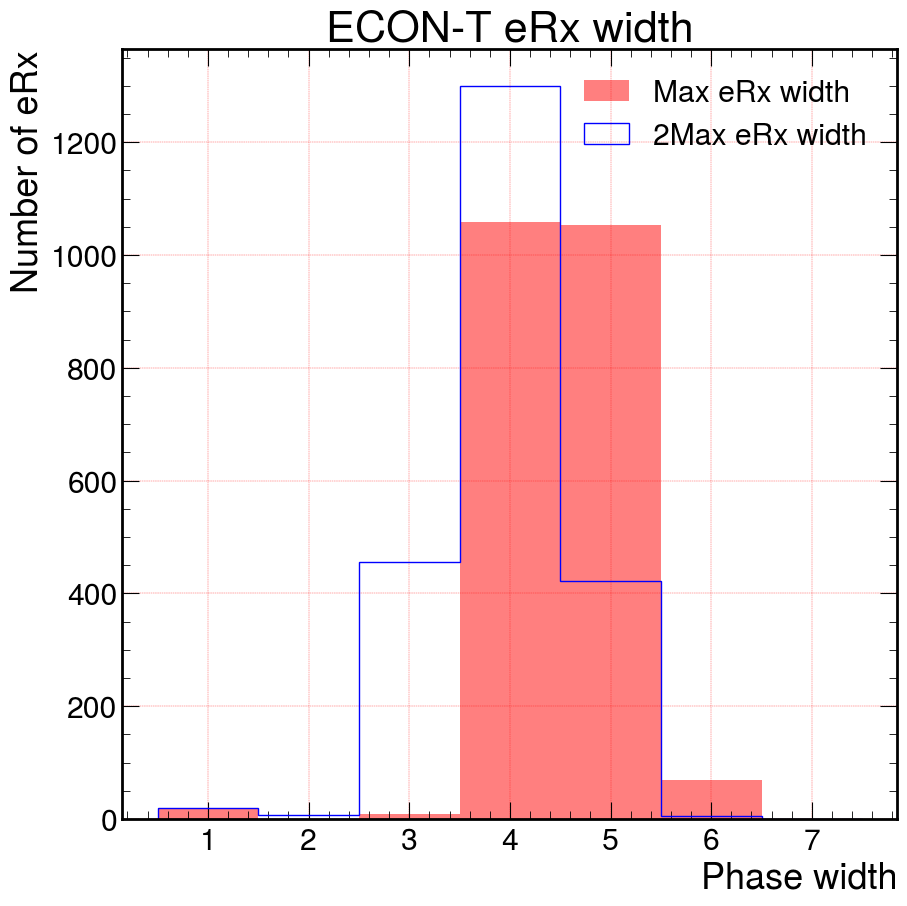

In [40]:
phase_width_hist_eRx("test_plots","Econt_database","Econt_table")



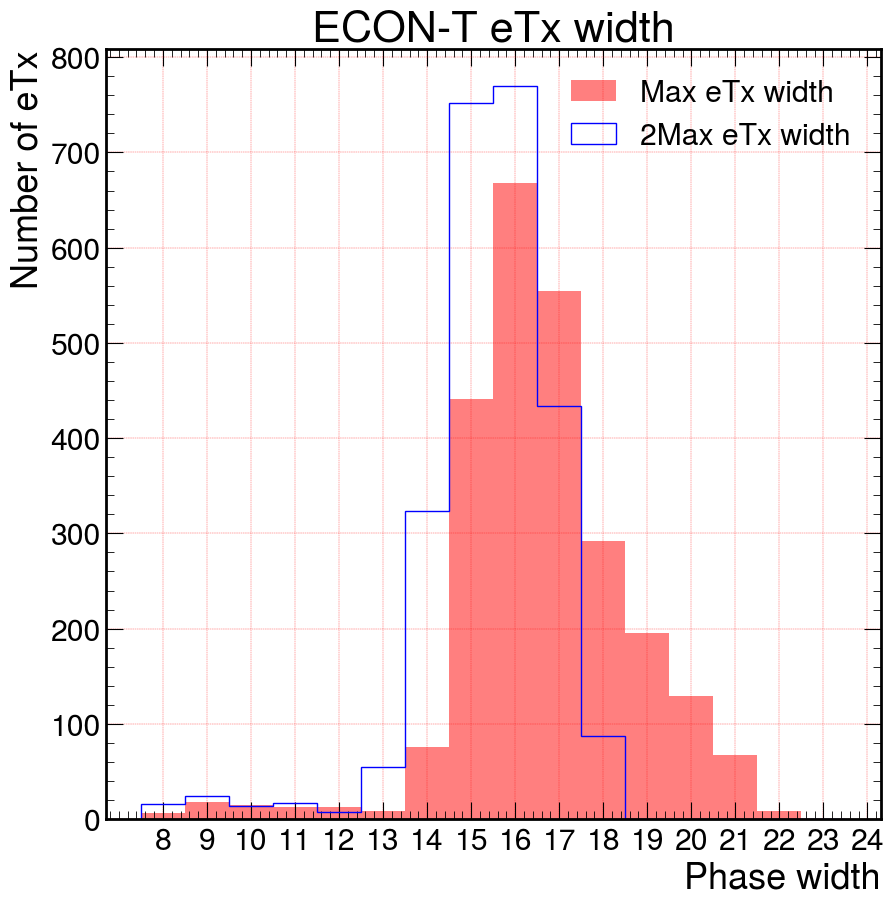

In [41]:
phase_width_hist_eTx("test_plots","Econt_database","Econt_table")

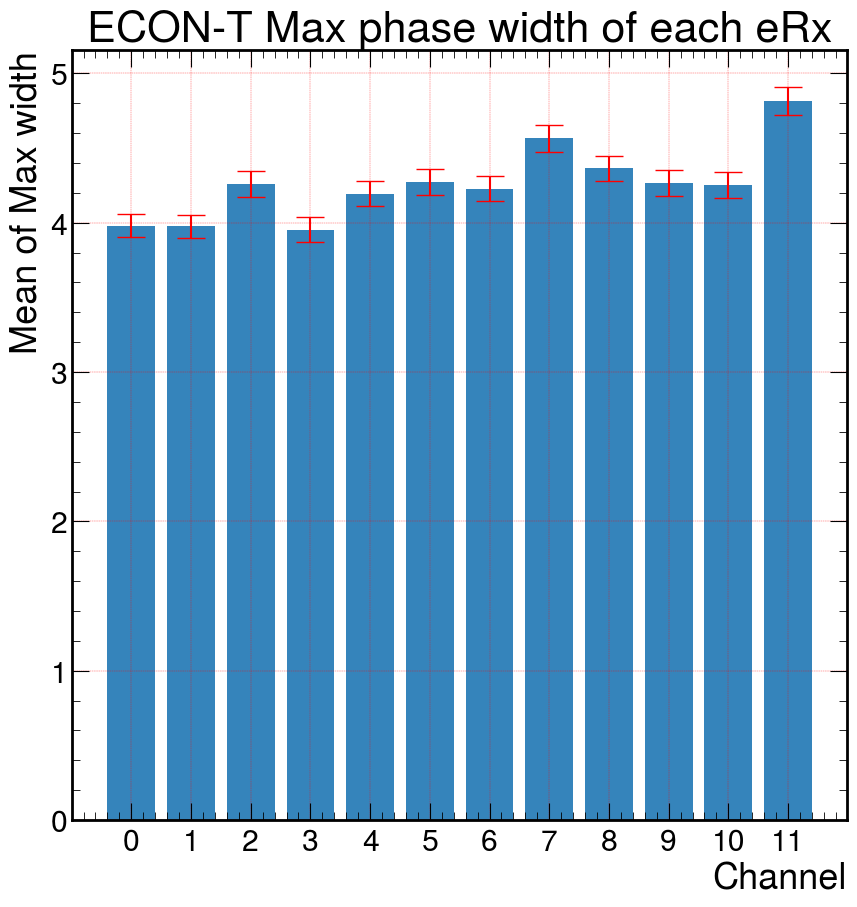

In [42]:
 mean_width_each_eRx(data="max_phase_width_eRx",label_="Max",out_dir="test_plots",database="Econt_database",table="Econt_table")

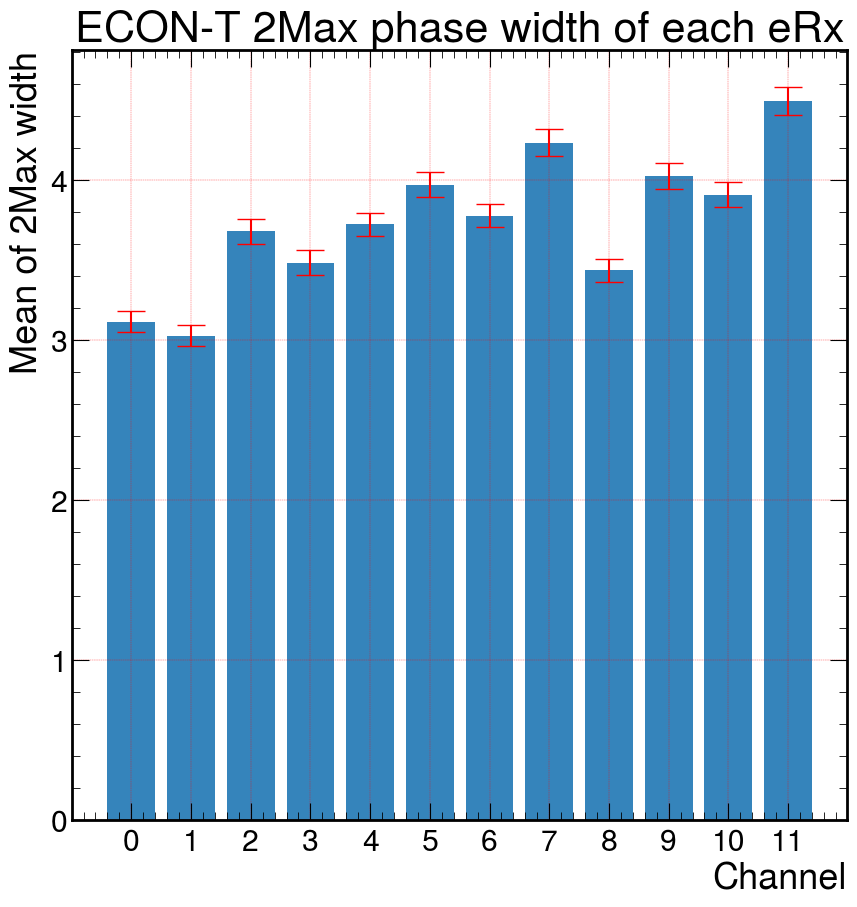

In [43]:
 mean_width_each_eRx(data="max2_phase_width_eRx",label_="2Max",out_dir="test_plots",database="Econt_database",table="Econt_table")

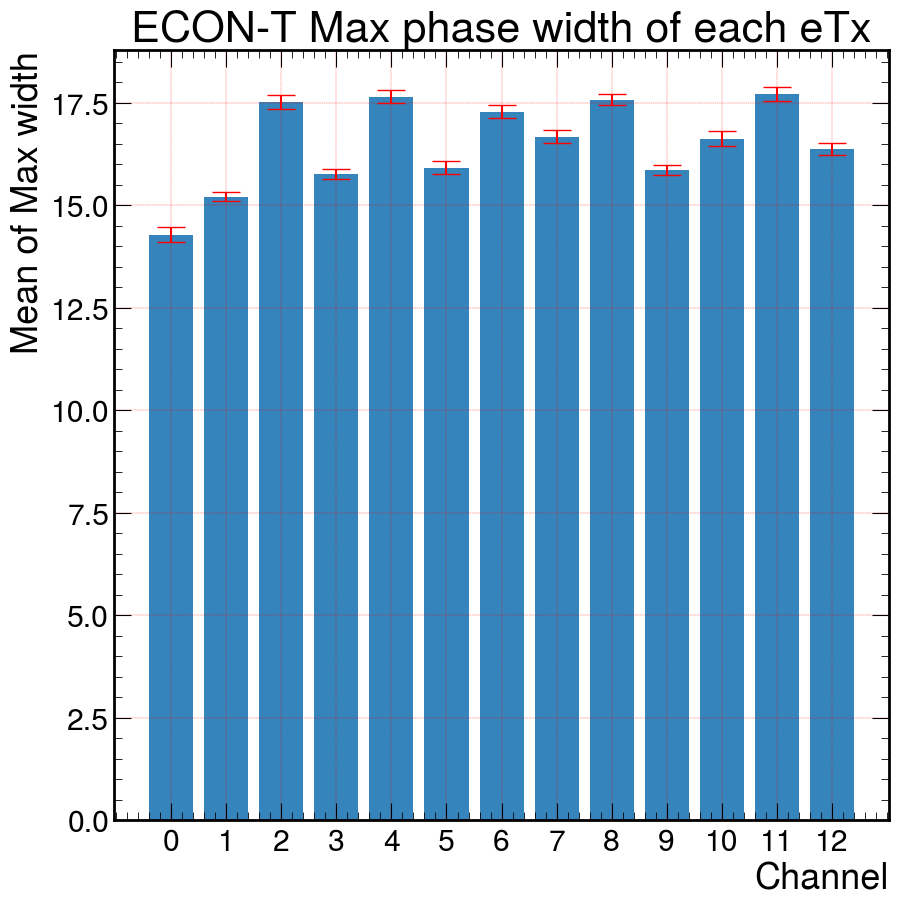

In [44]:
mean_width_each_eTx(data="max_phase_width_eTx",label_="Max",out_dir="test_plots",database="Econt_database",table="Econt_table")

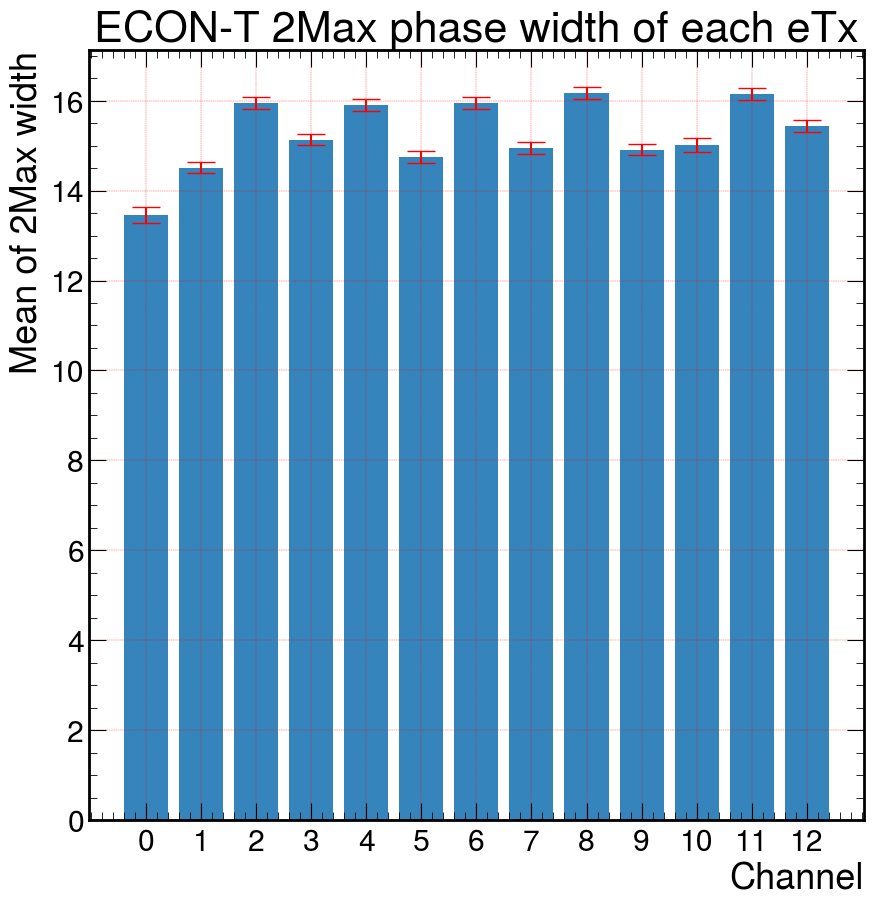

In [45]:
mean_width_each_eTx(data="max2_phase_width_eTx",label_="2Max",out_dir="test_plots",database="Econt_database",table="Econt_table")

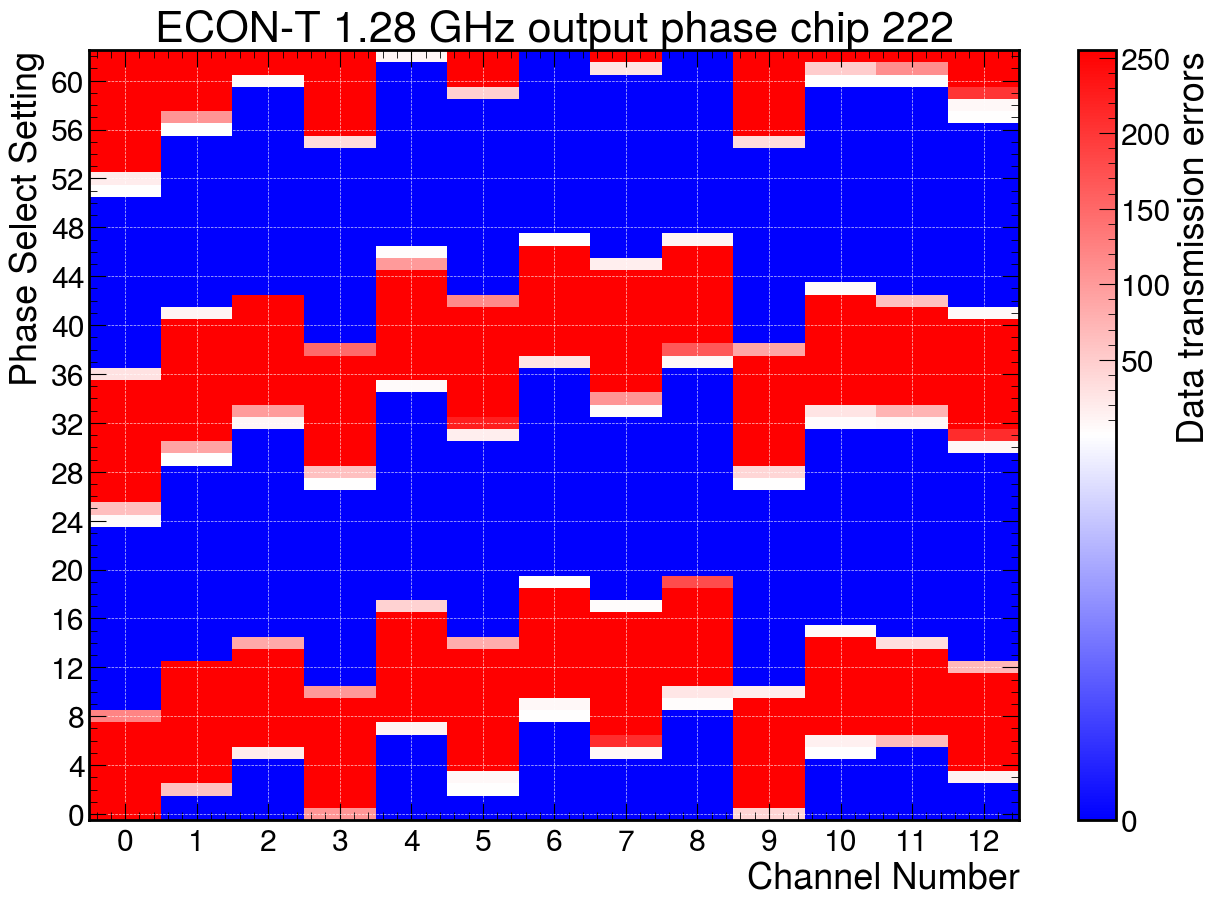

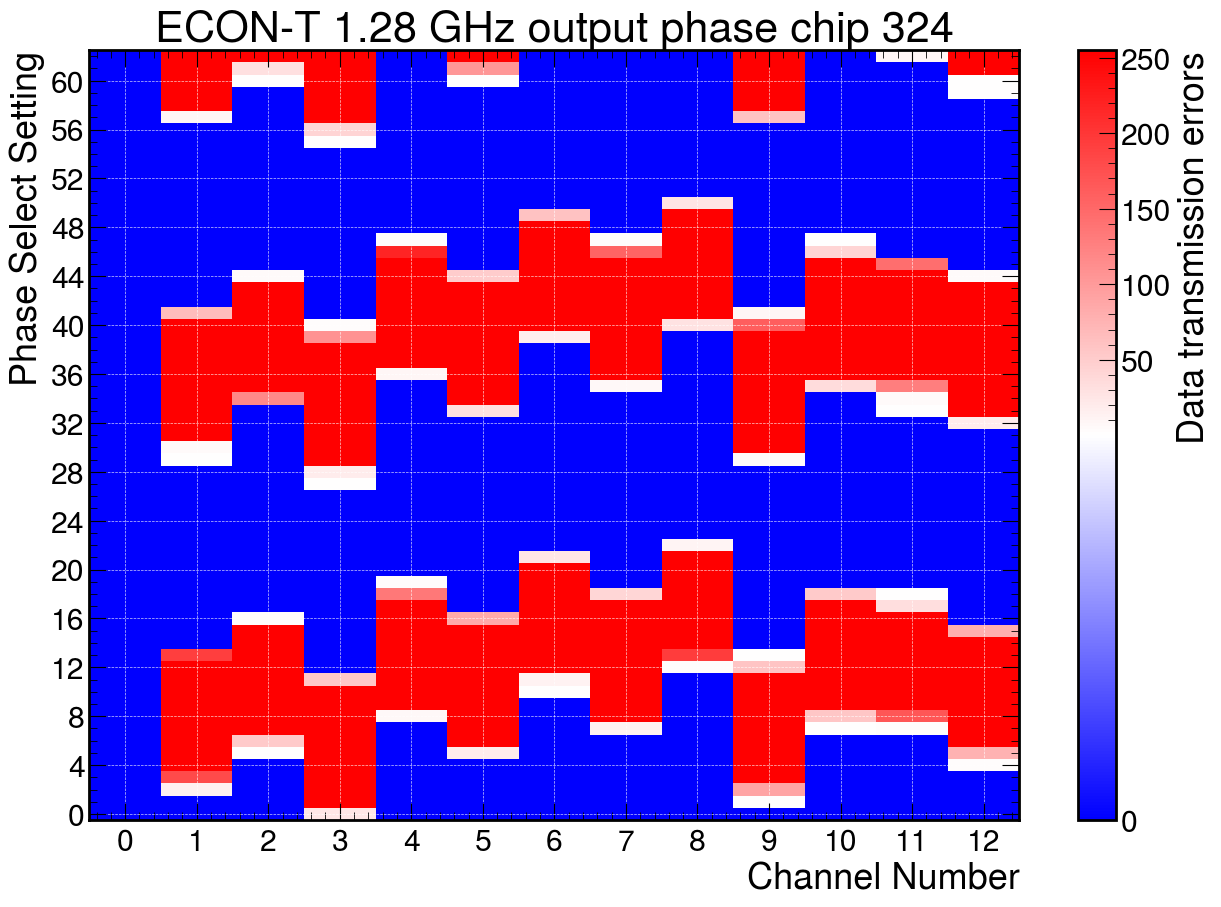

In [19]:
phase_scan_eTx(chip_number=222,out_dir='test_plots',database='Econt_database',table='Econt_table')
phase_scan_eTx(chip_number=324,out_dir='test_plots',database='Econt_database',table='Econt_table')

In [197]:
#passed one

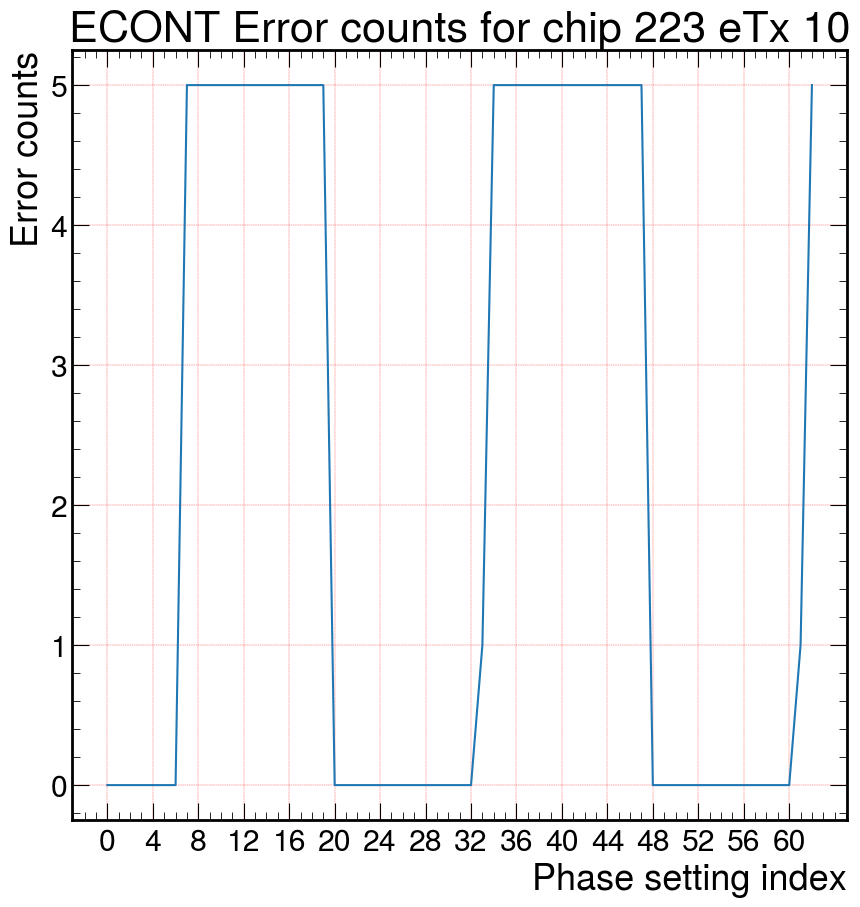

In [229]:
scan_eTx(chip_number=223,eTx=10, out_dir='test_plots',database='Econt_database',table='Econt_table')

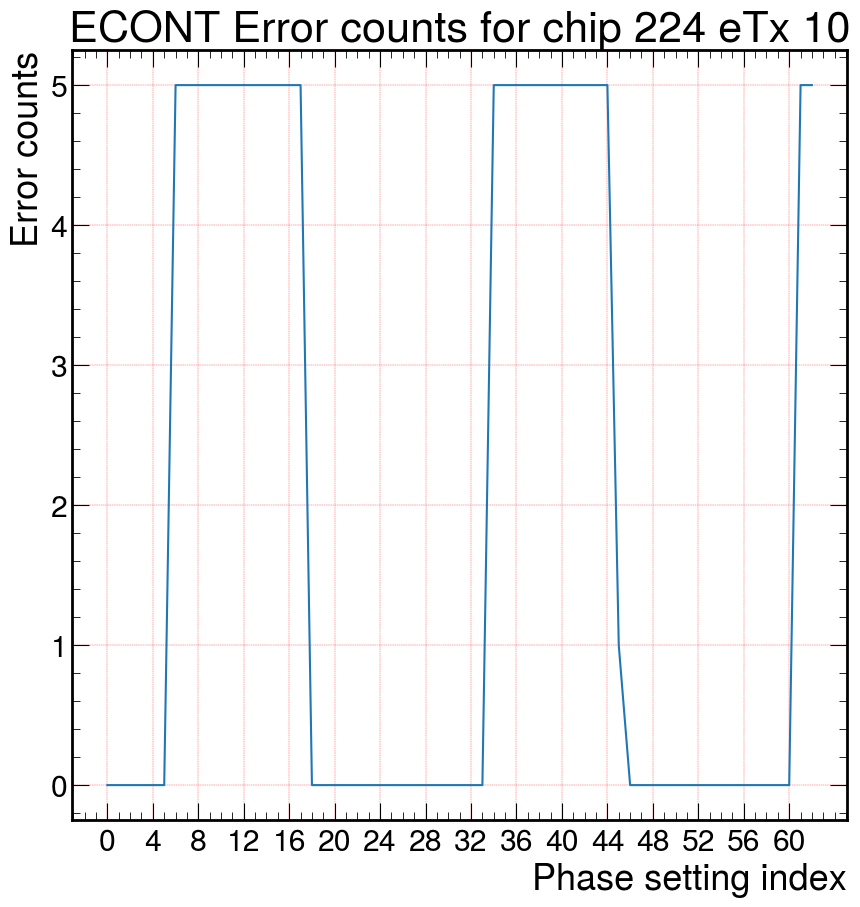

In [231]:
scan_eTx(chip_number=224,eTx=10, out_dir='test_plots',database='Econt_database',table='Econt_table')

In [223]:
##failed one

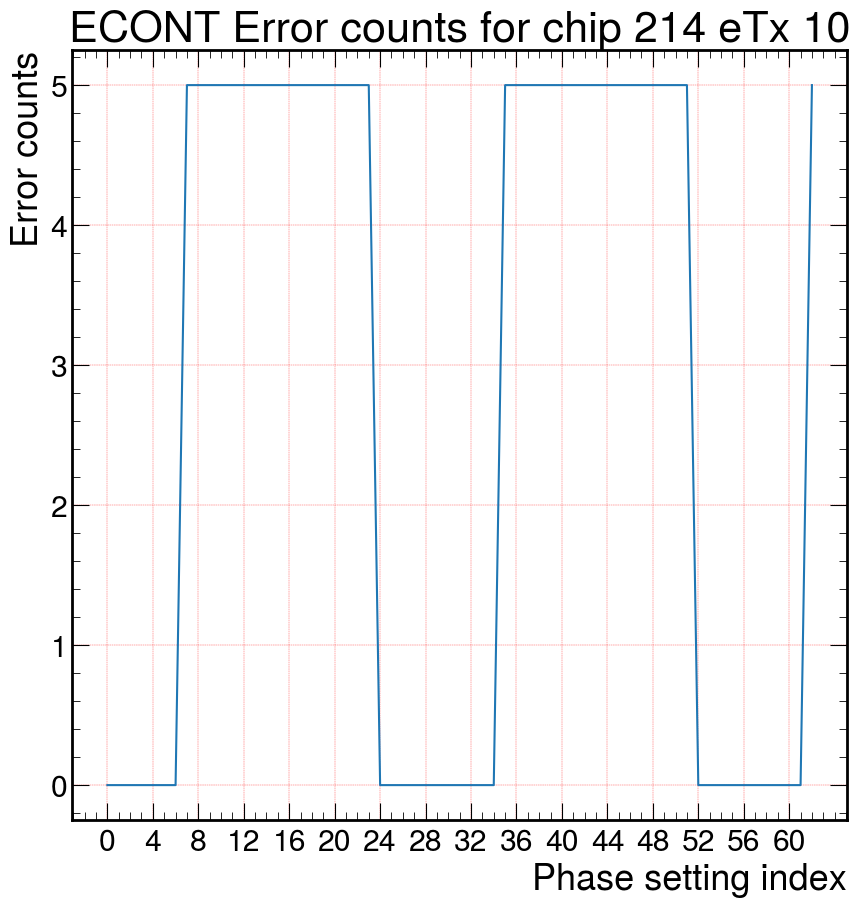

In [224]:
scan_eTx(chip_number=214,eTx=10, out_dir='test_plots',database='Econt_database',table='Econt_table')

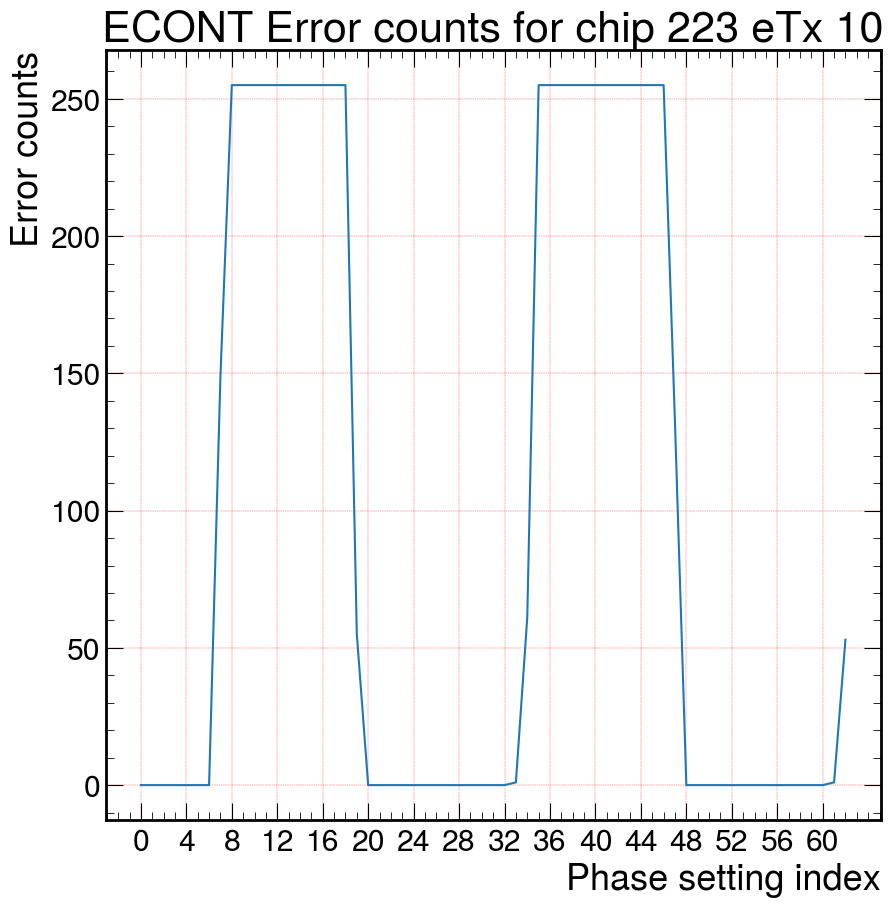

In [202]:
scan_eTx(chip_number=223,eTx=10, out_dir='test_plots',database='Econt_database',table='Econt_table')

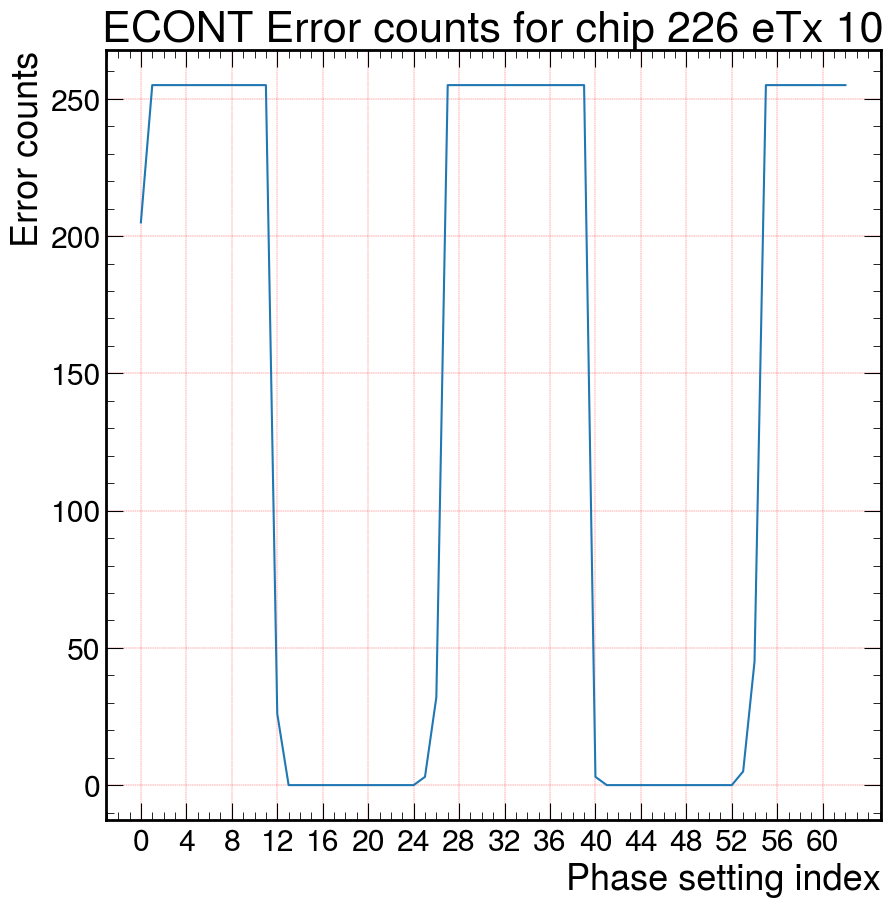

In [203]:
scan_eTx(chip_number=226,eTx=10, out_dir='test_plots',database='Econt_database',table='Econt_table')



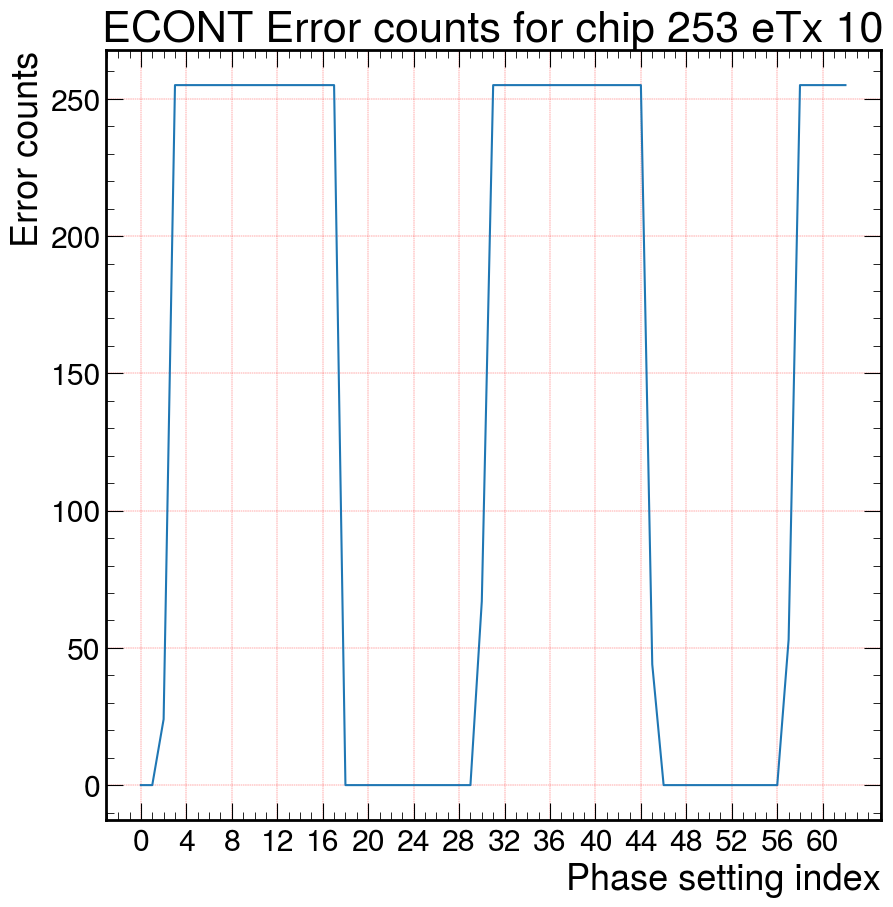

In [204]:
scan_eTx(chip_number=253,eTx=10, out_dir='test_plots',database='Econt_database',table='Econt_table')

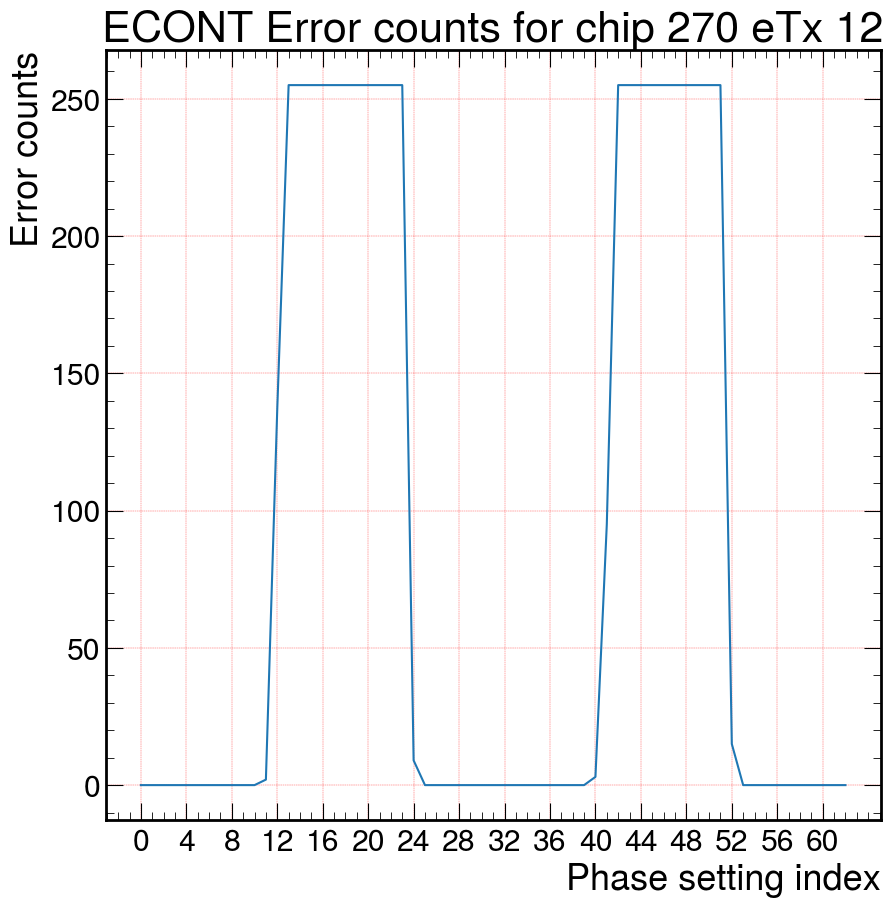

In [205]:
scan_eTx(chip_number=270,eTx=12, out_dir='test_plots',database='Econt_database',table='Econt_table')